# **Tabular Fake News Detection**

## **Background**

We are in an election year and news accuracy will be an increaing problem. The proliferation of online content and social media platforms has given rise to  the spread of fake news. Fake news refers to misleading or fabricated information presented as genuine news, often with the intention to deceive or manipulate public opinion. In many cases there are nation states involved. Detecting fake news has become a significant challenge, as it requires distinguishing between credible information and deceptive content. 

## **Problem Description**

Our charge is to develop several Machine Learning models capable of detecting fake news articles, with the end goal of developing the best possible model.

The data that we will use to do this from a tabular dataset containing metadata-level information about each article such as the word count, average word length, number of sentences and number of unique words. This dataset will contain both real and fake news articles, and the Machine Learning model's task is to correctly segregate the fake news articles from real.

You need to augment the EDA in this notebook - this would include better labels on the charts as well as addtional EDA functionality. You also need to develop 4 additional models.  There should be a summary table at the end of the notebook along with some graphical presentation of results.

## **Reading the Dataset**

In [2]:
# Importing the required libraries

# Library for data manipulation and analysis
import pandas as pd

# Library for statistical data visualization
import seaborn as sns
# Library for creating visualizations
import matplotlib.pyplot as plt

# Importing the RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

# Library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

 # Library for evaluating model accuracy
from sklearn.metrics import accuracy_score , f1_score, confusion_matrix

In [3]:
#Loading the dataset
df = pd.read_csv("Tabular_data_1.3.csv")

In [4]:
#Let us see the first 10 rows of the dataset
df.head(10)

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1
5,3159,39,5,16,4.582874,1
6,7232,11,4,21,5.756046,1
7,7509,11,5,21,4.502690,1
8,1509,11,6,24,3.943672,1
9,1657,11,8,19,5.419068,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   int64  
 1   Word_Count           4500 non-null   int64  
 2   Number_of_Sentence   4500 non-null   int64  
 3   Unique_Words         4500 non-null   int64  
 4   Average_Word_Length  4500 non-null   float64
 5   Label                4500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 211.1 KB


- Most columns are of the int64 data type, which is typically used for integer values. However, the "Average_Word_Length" column is of the float64 data type, suggesting that it contains decimal values.

- The "Non-Null Count" indicates that all 6 columns have 4500 non-null entries, meaning there are no missing values.

In [6]:
df = df.drop(['ID'], axis=1)

## **Summary Statistics**

In [7]:
df.describe()

,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,53.934000,8.934667,24.943333,4.968105,0.329556
std,24.872743,3.407847,11.540708,1.152394,0.470104
min,10.000000,4.000000,5.000000,3.000385,0.000000
25%,35.000000,6.000000,17.000000,3.980553,0.000000
50%,52.000000,9.000000,22.000000,4.906200,0.000000
75%,75.000000,12.000000,33.000000,5.996111,1.000000
max,100.000000,15.000000,50.000000,6.999799,1.000000


- **The mean of "Word_Count" is 53.934, and "Number_of_sentence" is 8.93.**

- The median of "Unique_Words" is 22, indicating that half of the data points have unique word counts below this value.

- The maximum Number_of_sentence is 15.

- The maximum count of unique words in a sentence is 50. This means that there is a sentence with a vocabulary of 50 distinct words.



## **Exploratory Data Analysis (EDA)**

In [8]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    data[feature].describe()
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


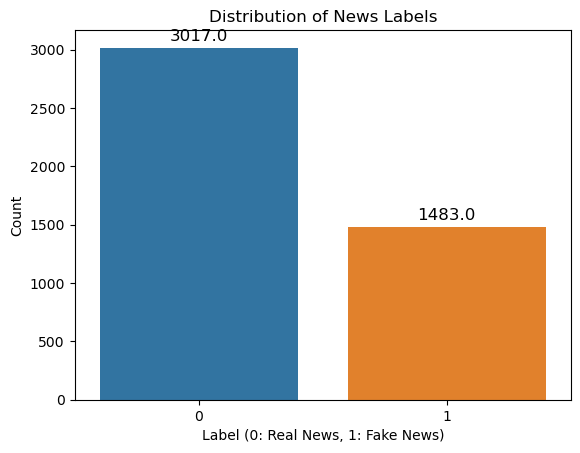

In [9]:
# Plotting the distribution of labels
ax = sns.countplot(x='Label', data=df)

# Adding labels and title
plt.xlabel('Label (0: Real News, 1: Fake News)')
plt.ylabel('Count')
plt.title('Distribution of News Labels')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

**The dataset contains 3017 instances of Real News (Label 0) and 1483 instances of Fake News (Label 1).** This indicates a **class imbalance**, where the number of real news instances is significantly larger than the number of fake news instances.

This could potentially impact the performance of a Machine Learning model, as it might be biased towards classifying news as real due to the larger number of instances.

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


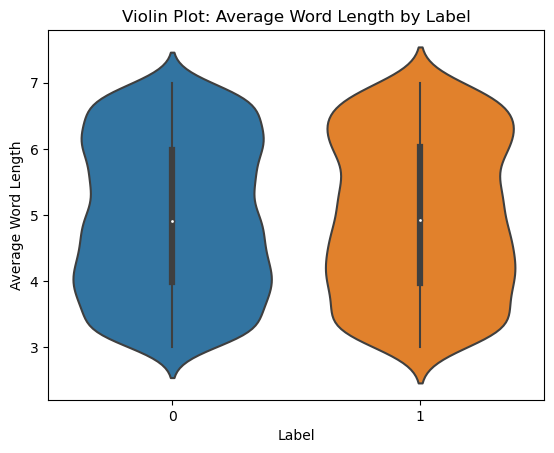

In [10]:
# Create a violin plot
sns.violinplot(x="Label", y="Average_Word_Length", data=df)
plt.title("Violin Plot: Average Word Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Word Length")
plt.show()

- The width of the plot represents the density of data at different average word lengths. A wider portion indicates higher density, while narrower portions indicate lower density.

- The violin plot shows variations in density within certain ranges of average word lengths. These variations might indicate specific patterns or trends in writing style for both real and fake news articles

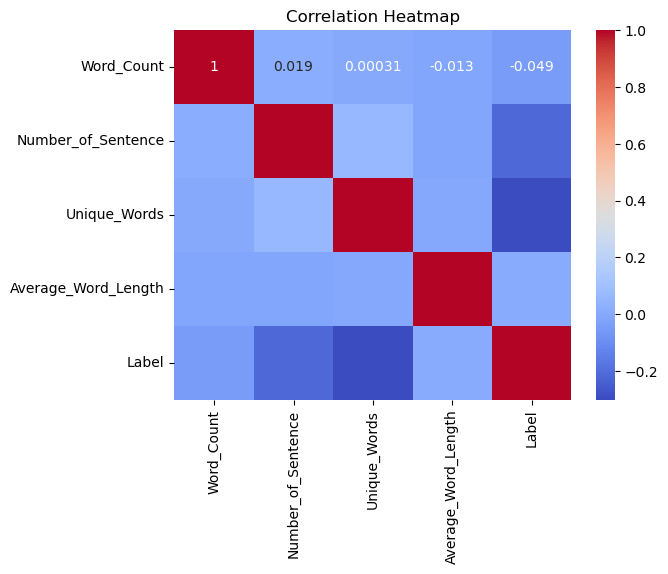

In [11]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Insights from the Correlation Heatmap**

- The correlation between "Word_Count" and the "Label" is approximately -0.0489. This indicates a very weak negative correlation between the word count of an article and whether it is real news (Label 0) or fake news (Label 1).

- **The correlation between "Number_of_Sentence" and the "Label" is approximately -0.21.** This moderate negative correlation suggests that there's a more noticeable relationship between the number of sentences in an article and whether it's a fake news article or not.

- **The correlation between "Unique_Words" and the "Label" is approximately -0.3. This moderate negative correlation suggests that fake news articles tend to use fewer unique words compared to real news articles. This could be an interesting feature for classification, as it indicates differences in vocabulary richness between the two categories.**

- Most of the correlations between the other pairs of variables are close to zero or very low. This indicates a lack of strong linear relationships between these pairs of variables.

### Univariate analysis

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


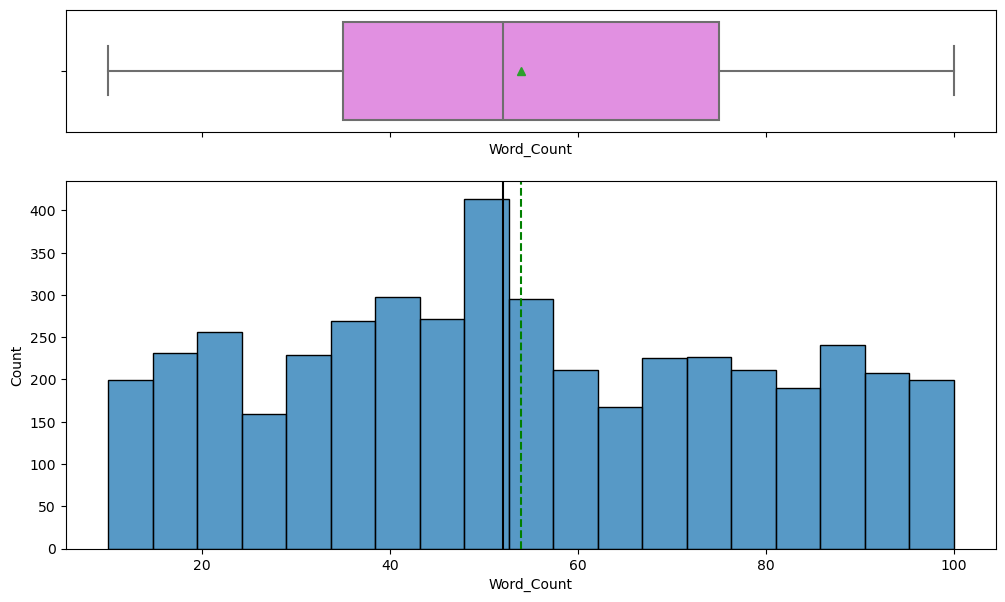

In [12]:
histogram_boxplot(df, 'Word_Count');

Observations:
- No outliers
- Average wordcount around 50
- Max wordcount 100

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


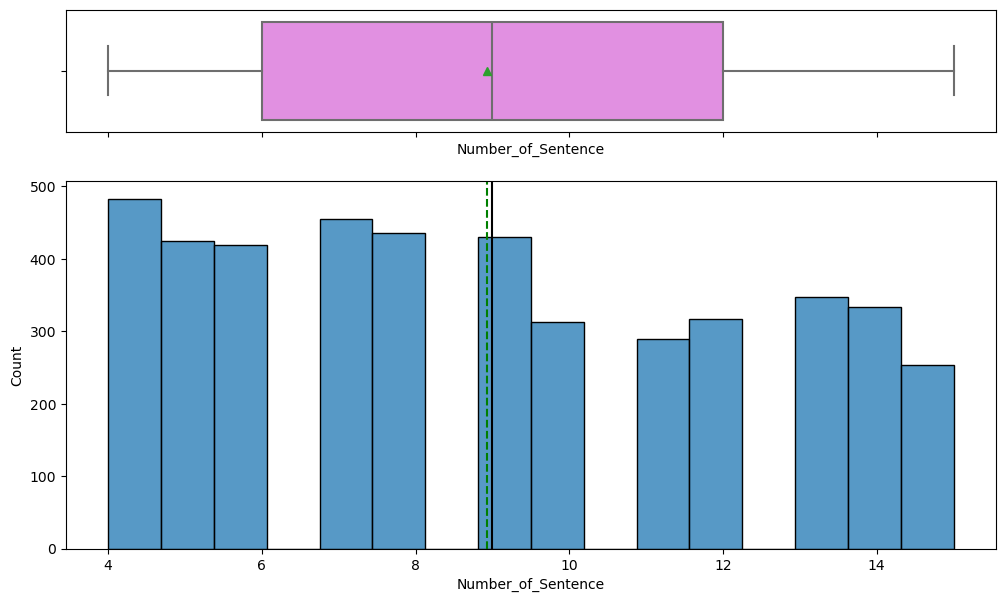

In [13]:
histogram_boxplot(df, 'Number_of_Sentence');

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


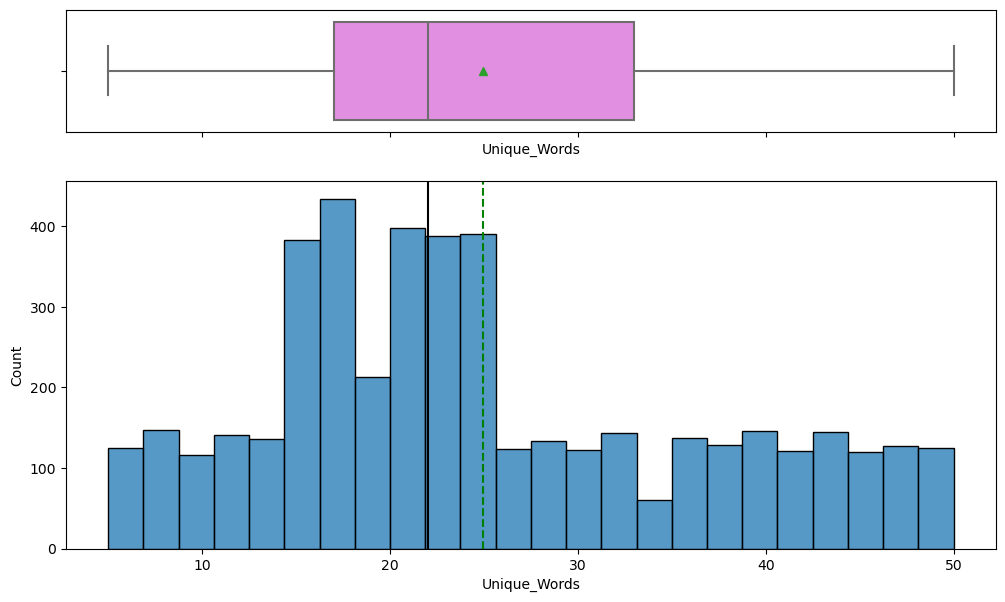

In [14]:
histogram_boxplot(df, 'Unique_Words');

Observations:
- Irregular distribution
- Most end up between 12 and 22 unique words
- Max unique words is 50

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


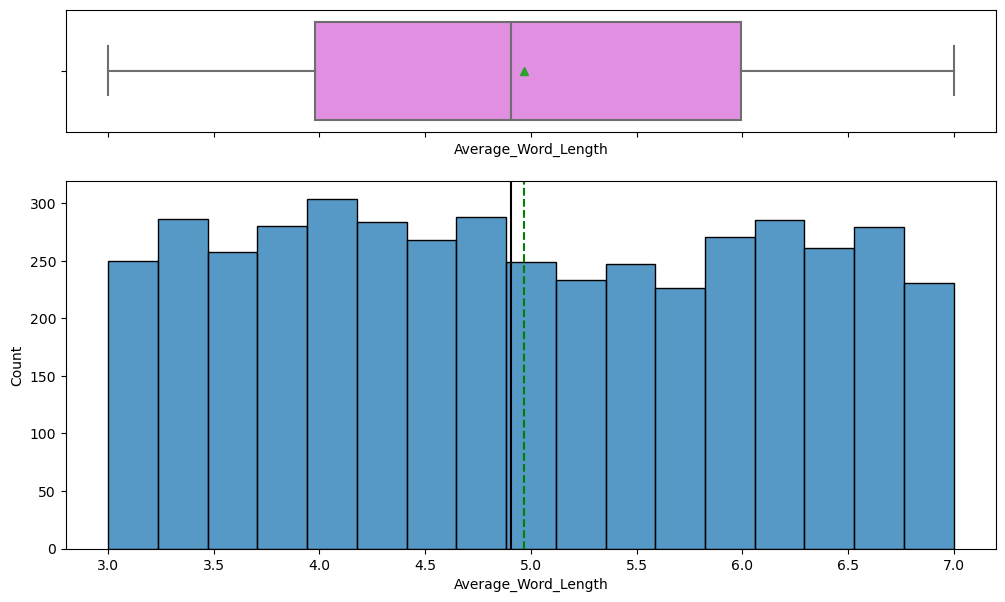

In [15]:
histogram_boxplot(df, 'Average_Word_Length');

Observations:
Similar count for all wordlengths

### Bivariate Analysis


In [16]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

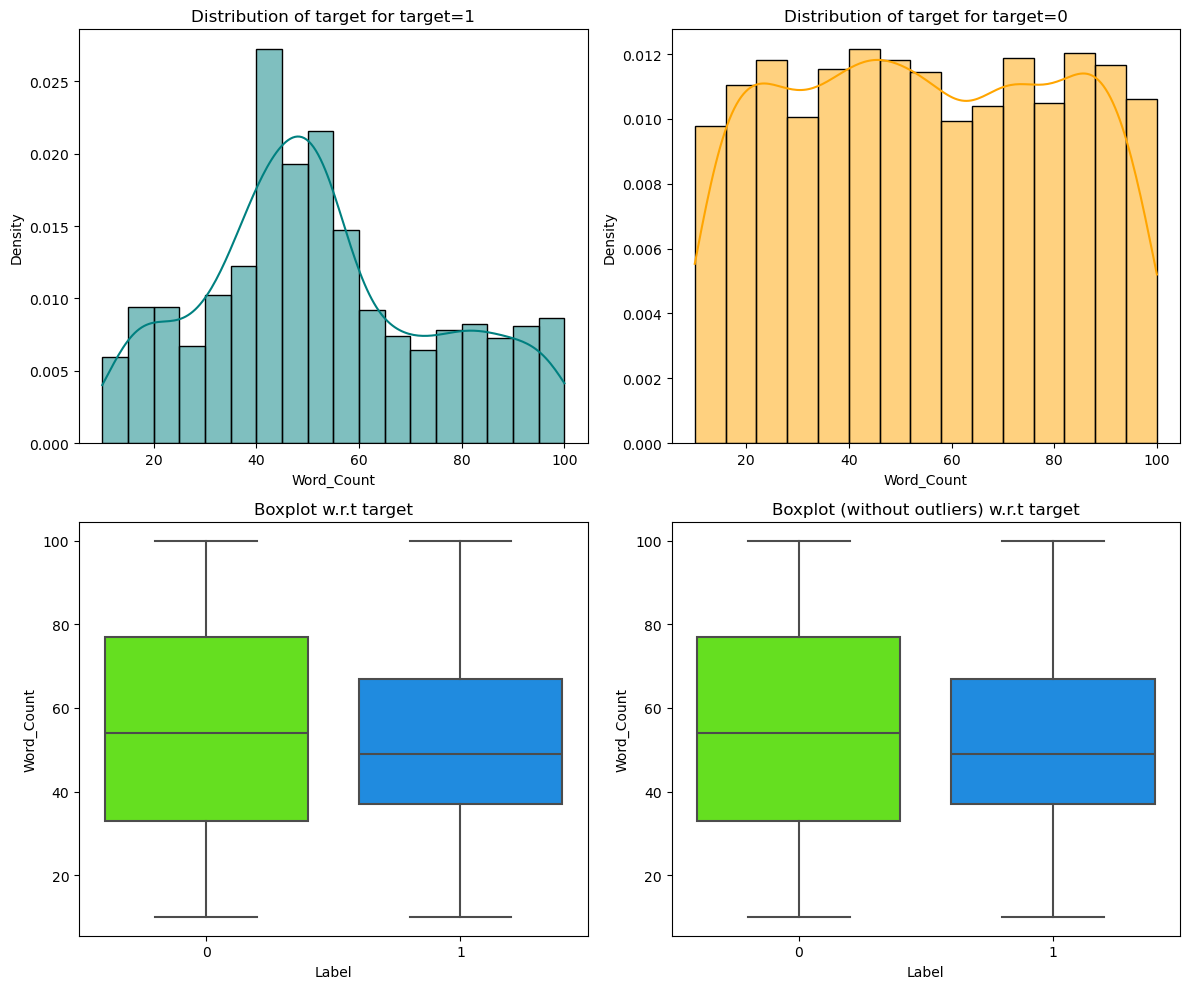

In [17]:
distribution_plot_wrt_target(df, 'Word_Count', 'Label')

Observations:
- Fake news seems to have between 40 and 60 words on average
- Real news has similar amounts to wordcounts with 0-100

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

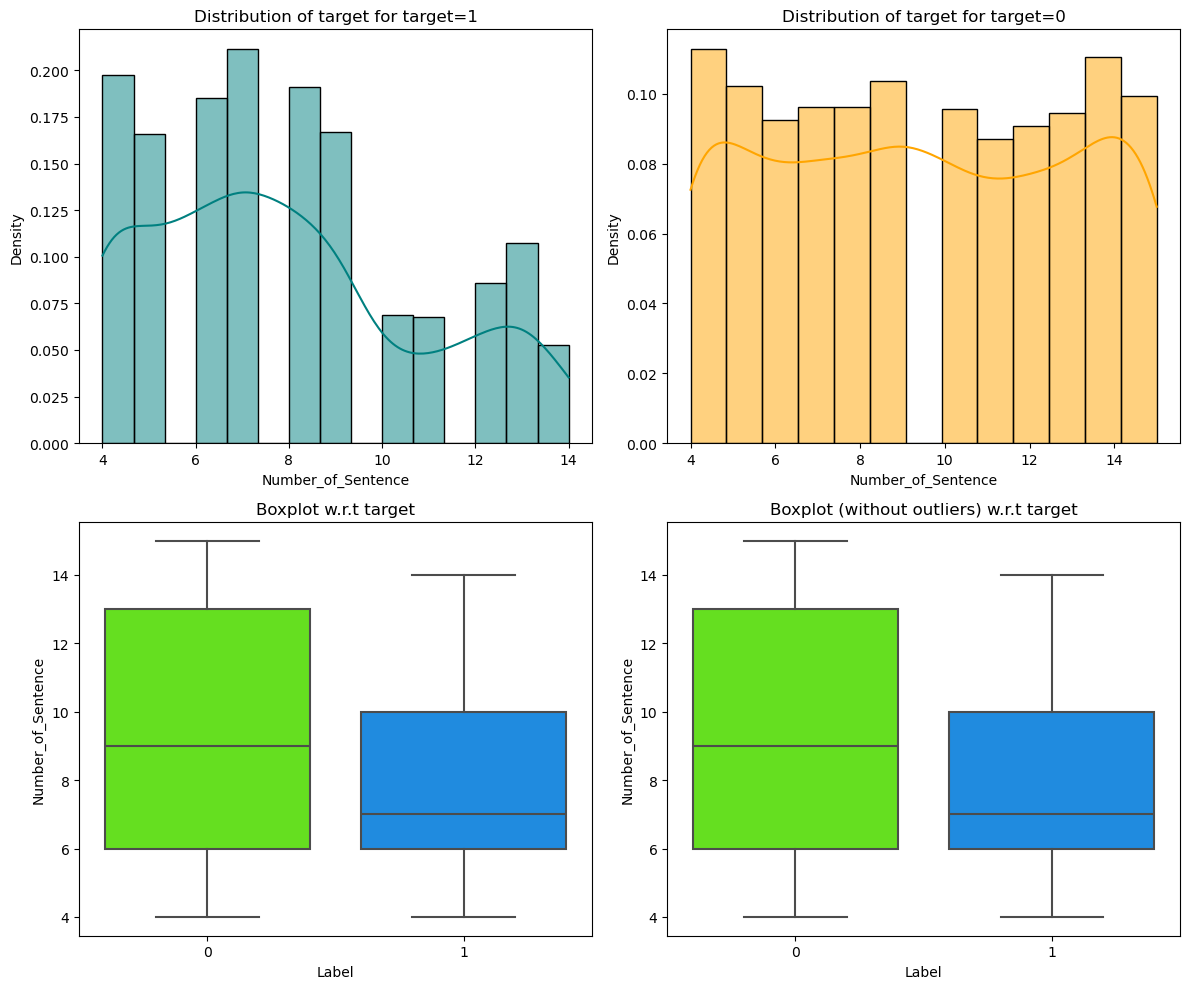

In [18]:
distribution_plot_wrt_target(df, 'Number_of_Sentence', 'Label')

Observations:
- Number of sentences tends to be lower for fake news
- Number of sentences varies for real news

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

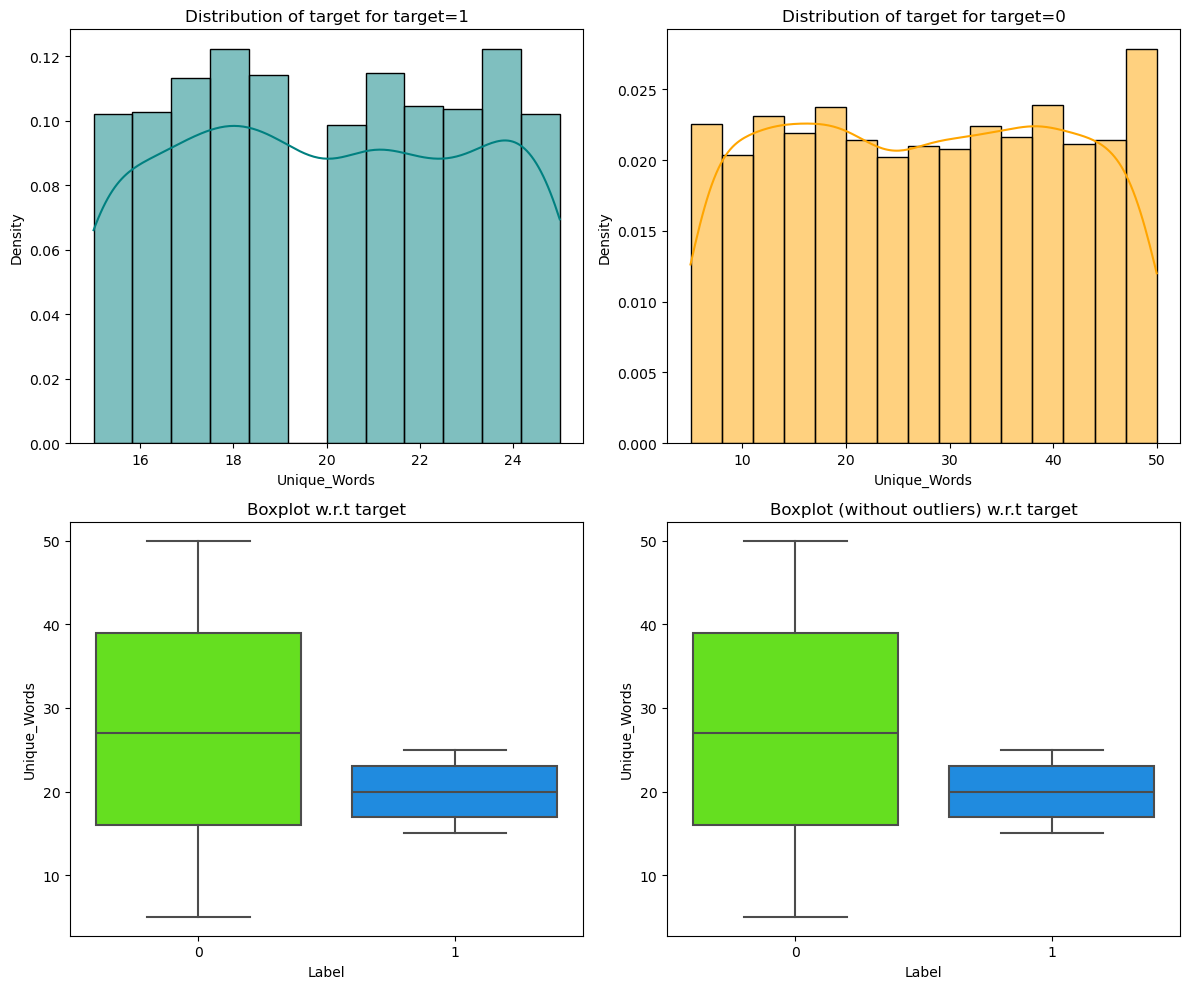

In [19]:
distribution_plot_wrt_target(df, 'Unique_Words', 'Label')

Observations:
- Fake news has a range of unique words from 15-224
- Real news has a range of unique words from less than 10 to 50 

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

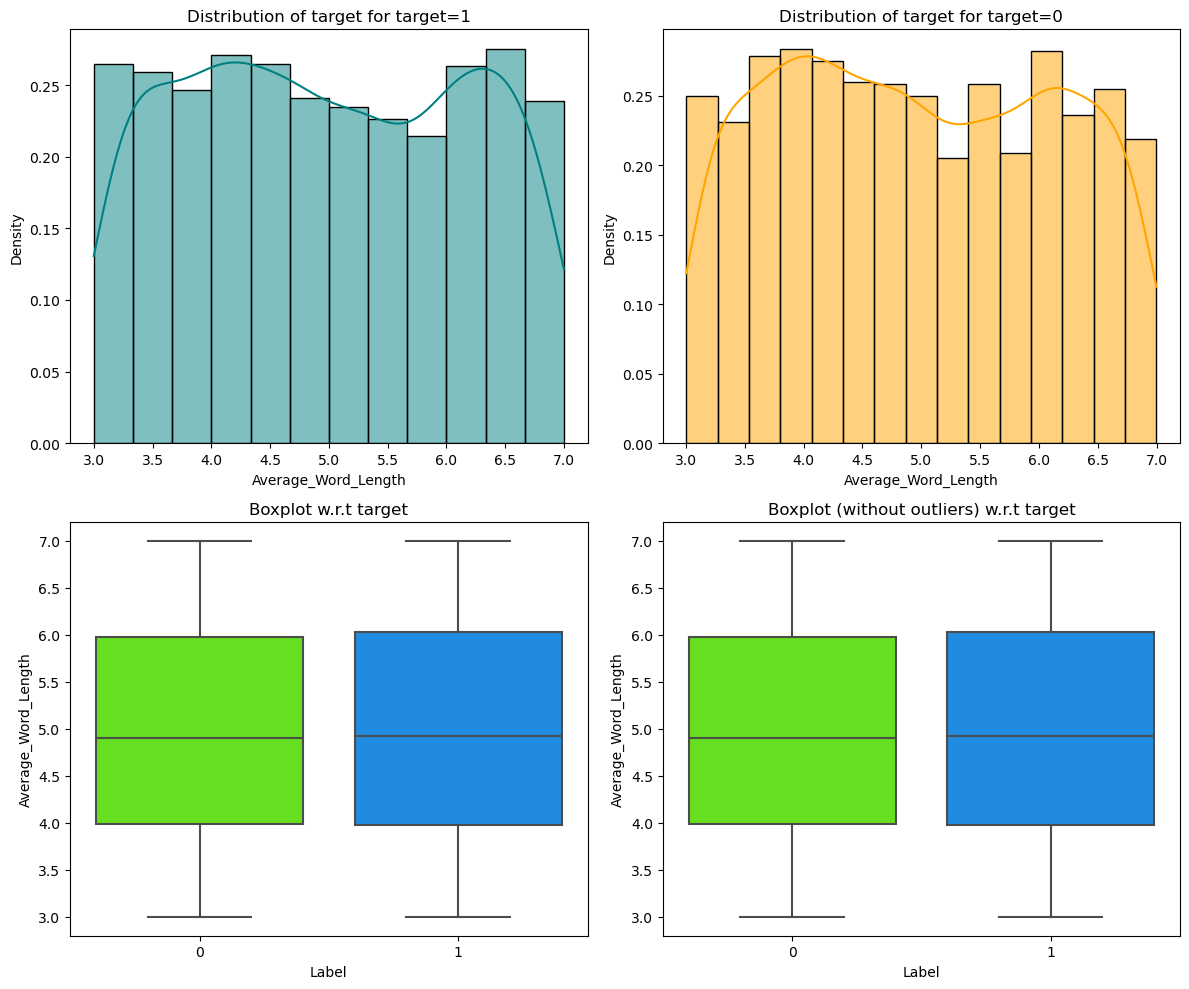

In [20]:
distribution_plot_wrt_target(df, 'Average_Word_Length', 'Label')

Observations: Seems to be a similar distribution for both

## **Model Building**

Insert documentation that describes the split ratio and why training and test datasets.  Document the RadomForestClassifier class and what the hyperparameter options area.  Make sure to describe what the fit process is for and conclude with an evaluation using the metrics accuracy, precision, recall and F1 score.


In [42]:
# Separate features (X) and target variable (y)
X = df.drop(['Label'], axis=1)
y = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) #split into 70 percent train and 30 percent test data set. Use train to have the model learn and test for accuracy.

In [23]:
# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators =150,max_depth =5,random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [24]:
# Make predictions on the train data using the trained model
y_train_pred = rf_model.predict(X_train)

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8903703703703704




89 percent of the time the model can predict wheter there is fake news or not.

In [27]:
# Calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8593155893536121


In [31]:
from tabulate import tabulate
from sklearn.metrics import recall_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create table
table = [["Accuracy", accuracy],
         ["Recall", recall],
         ["F1 Score", f1]]

# Display table
print(tabulate(table, headers=["Metric", "Score"], tablefmt="grid"))

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.89037  |
+----------+----------+
| Recall   | 1        |
+----------+----------+
| F1 Score | 0.859316 |
+----------+----------+


F1 score shows predictive accuracy, anything over a .7 is generally good

<Axes: >

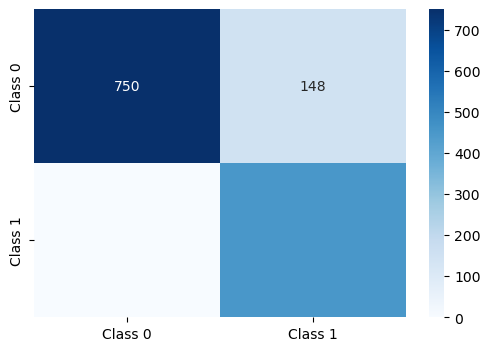

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

## **Insights**

- Model performed well with 0 predictions of real class 1 and predicting class 0
- need to work on false class 0
- Model performed well with accuracy, recall, and f1 score

In [51]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

decision_tree_model = DecisionTreeClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)

# Define models
models = {
    'Decision Tree': decision_tree_model,
    'Gradient Boosting': gbm_model,
    'Logistic Regression': logreg_model,
    'SVM': svm_model
}

# Train and evaluate models
results = {'Model': [], 'Train Accuracy': [], 'Train Recall': [], 'Train F1 Score': [],
           'Test Accuracy': [], 'Test Recall': [], 'Test F1 Score': []}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Train metrics
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred)
    
    # Test metrics
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    
    # Save results
    results['Model'].append(name)
    results['Train Accuracy'].append(train_acc)
    results['Train Recall'].append(train_recall)
    results['Train F1 Score'].append(train_f1)
    results['Test Accuracy'].append(test_acc)
    results['Test Recall'].append(test_recall)
    results['Test F1 Score'].append(test_f1)

# Create DataFrame for results
results_df = pd.DataFrame(results)

# Print results table
print(results_df)

                 Model  Train Accuracy  Train Recall  Train F1 Score  \
0        Decision Tree        1.000000      1.000000        1.000000   
1    Gradient Boosting        0.912778      1.000000        0.882397   
2  Logistic Regression        0.633333      0.203735        0.266667   
3                  SVM        0.672778      0.000000        0.000000   

   Test Accuracy  Test Recall  Test F1 Score  
0       0.853333     0.786885       0.784314  
1       0.891111     0.993443       0.860795  
2       0.635556     0.226230       0.296137  
3       0.661111     0.000000       0.000000  


## **Conclusions**

- Decision tree was over fit
- Gradient boosting was the best model with a .89 test accuracy and .99 test recall
- logistic regression did not work the best
- SVM had similarly poor reults as logistic regression, cant get recall or test score on there.

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

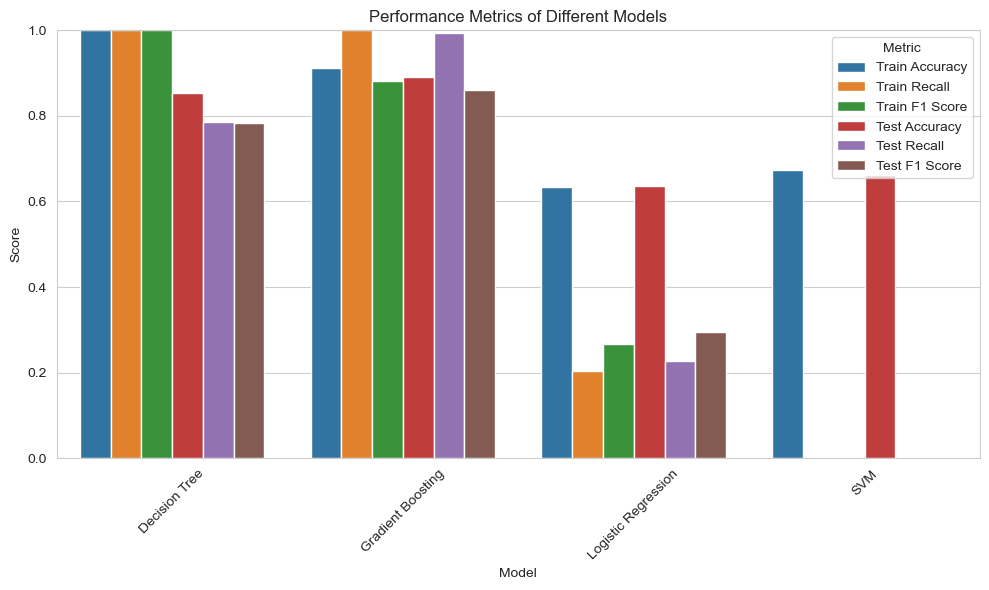

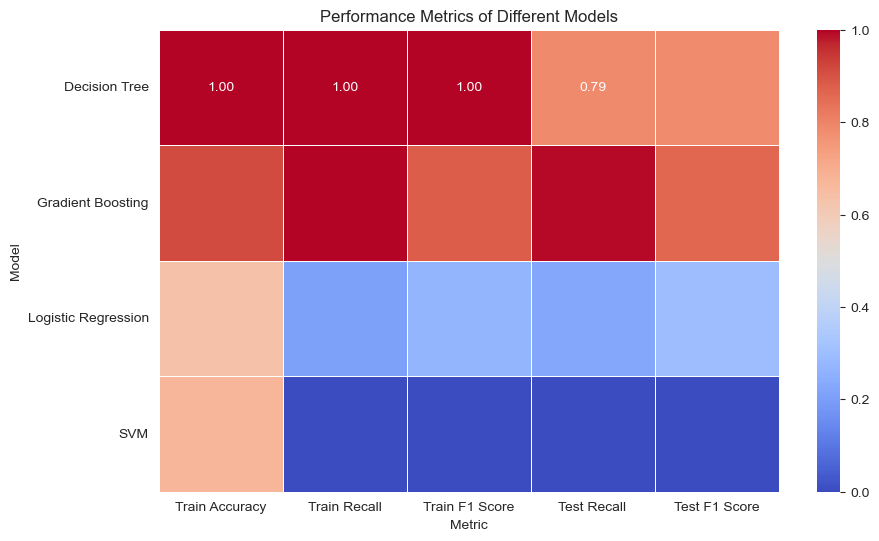

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'), x='Model', y='Score', hue='Metric')
plt.title('Performance Metrics of Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistency in scale
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(10, 6))
heatmap_data = results_df.set_index('Model').drop('Test Accuracy', axis=1)  # Exclude test accuracy for better visualization
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Performance Metrics of Different Models')
plt.xlabel('Metric')
plt.ylabel('Model')
plt.show()

This case study ...  of course, you need the additional models.